In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pickle
%matplotlib widget

We will focus on the flat analysis in this notebook so we have to upload the flat list we prepared in the first notebook.

In [3]:
flat_list = np.genfromtxt('./group10_WASP-135_20190803/flat/flat.list', dtype=str)
#print(flat_list) #To check that it works correctly


In the first lecture we computed the error associated with the bias and the readout noise obtained when analyzing the bias frames. We need to upload those values, as well as the gain.

From last lecture:

Julian date       : 2458699.475185 JD

CCD Gain          : 1.91 [e/ADU] 

CCD Readout noise : 7.10 [e]

We chose the value 1.33 for the bias_std because it's the one the fits the data better at the end of the first notebook

In [4]:
median_bias = pickle.load(open("median_bias.p", "rb"))
bias_std = 1.33 # [e] = photoelectrons
readout_noise = 7.10 # [e] = photoelectrons
gain = 1.91 #[e/ADU] from the header file

As safety check we gather again those values from the flat headers

In [5]:
flat00_fits = fits.open('./group10_WASP-135_20190803/flat/'+flat_list[0]) #Open the first flat file
flat00_data = flat00_fits[0].data * gain

print('CCD Gain          : {0:4.2f} {1:.8s}'.format(flat00_fits[0].header['GAIN'], flat00_fits[0].header.comments['GAIN']))
print('CCD Readout Noise : {0:4.2f} {1:.3s}'.format(flat00_fits[0].header['RDNOISE'], flat00_fits[0].header.comments['RDNOISE']))
print('Shape of the FITS image from the header : {0:4d} x {1:4d} pixels'.format(flat00_fits[0].header['NAXIS1'], flat00_fits[0].header['NAXIS2']))


CCD Gain          : 1.91 [e/ADU] 
CCD Readout Noise : 7.10 [e]
Shape of the FITS image from the header :  521 x  119 pixels


### Overscan
If we let matplotlib automatically choose the range of the colorbar and we plot the counts as a funztion of the column number, we can see that there are two strips at the margins of the image with a much lower number of counts. Those columns are known as $\textbf{overscans}$.
The overscan regions of a CCD form as a part of the sensor is covered and does not receive any light, thus acting like a local bias. One can use the values in the overscan as bias when the bias frames are not available. Generally speaking, you can replace the median bias with the overscan only if there is no variation of bias along the horizontal axis, otherwise it is preferable to compute the median bias from the bias frames if available.

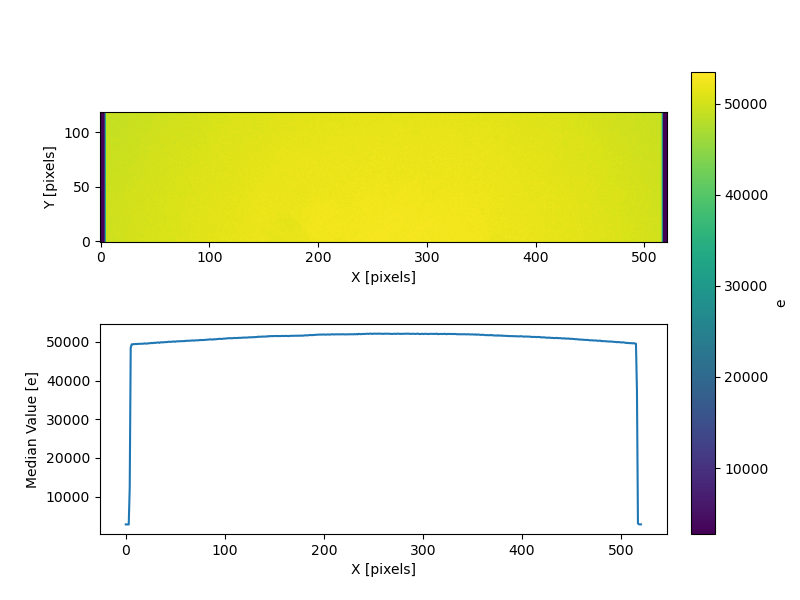

In [6]:
fig, ax = plt.subplots(2,1, figsize=(8,6)) #Creiamo un subplot con due grafici
im1 = ax[0].imshow(flat00_data, origin='lower') #Il primo plot mostra i conteggi del primo flat file che abbiamo caricato prima in un'immagine 2D
median_column = np.average(flat00_data, axis=0) #Calcoliamo la mediana dei dati del primo flat facendo scorrere le righe (quindi otteniamo un valore per colonna)
im2 = ax[1].plot(median_column) #Il secondo plot mostra la mediana dei conteggi in funzione delle colonne (Ci aspettiamo un valore basso agli estremi e alto al centro)

cbar = fig.colorbar(im1, ax=ax, fraction=0.046, pad=0.04) #Aggiungiamo una colorbar al primo grafico
cbar.set_label("e") #Aggiungiamo una label alla color bar che in questo caso misura i conteggi, ossia photoelectrons

#Aggiungiamo una label agli assi del primo grafico (pixel in un'immagine 2D)
ax[0].set_xlabel('X [pixels]')
ax[0].set_ylabel('Y [pixels]')

#Nel secondo grafico abbiamo pixel sulla X (numero della colonna) e la mediana dei photoelectrons di una colonna su Y
ax[1].set_xlabel('X [pixels]')
ax[1].set_ylabel('Median Value [e]')
plt.show()

### Dealing with Overscans
Their presence is a problem when we perform statistics on the whole frame. We can exclude the outer columns from the analysis when computing full-frame statistics and visualization. Let's plot our frame again but we compute the minimum and maximum values of counts, excluding the overscan regions.

In [7]:
vmin = np.amin(flat00_data[:, 12:-12]) #Minimo tra tutte le righe, le colonne dalla 12 alla -12
vmax = np.amax(flat00_data[:, 12:-12])
print(vmin, vmax)

48502.54 53460.899999999994
